In [181]:
import pandas as pd 
import numpy as np


CarBuyAccuracy is the Target attribute and the left 6 attributes are the characteristics based on which the Target variable should be predicted

In [182]:
df = pd.read_csv("car.csv",sep = ",",names=["buyingPrice","maintPrice","doors","persons","lug_boot","safety","CarBuyAccuracy"])

In [183]:
df.head()

,buyingPrice,maintPrice,doors,persons,lug_boot,safety,CarBuyAccuracy
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df.corr())
df.head()

,buyingPrice,maintPrice,doors,persons,lug_boot,safety,CarBuyAccuracy
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [186]:
df.replace(["vgood","good","acc","unacc"],[3,2,1,0],inplace=True)
df.replace(["vhigh", "high", "med", "low"],[3,2,1,0],inplace=True)
df.replace([ "big", "med", "small"],[2,1,0],inplace=True)
df.replace(["more","5more"],0,inplace=True)



In [187]:
df.head()

,buyingPrice,maintPrice,doors,persons,lug_boot,safety,CarBuyAccuracy
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buyingPrice       1728 non-null int64
maintPrice        1728 non-null int64
doors             1728 non-null object
persons           1728 non-null object
lug_boot          1728 non-null int64
safety            1728 non-null int64
CarBuyAccuracy    1728 non-null int64
dtypes: int64(5), object(2)
memory usage: 94.6+ KB


In [189]:
df["doors"].value_counts()

2    432
4    432
3    432
0    432
Name: doors, dtype: int64

In [190]:
df.loc[:,"doors"] = df.loc[:,"doors"].astype('int64')
df.loc[:,"persons"] = df.loc[:,"persons"].astype('int64')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buyingPrice       1728 non-null int64
maintPrice        1728 non-null int64
doors             1728 non-null int64
persons           1728 non-null int64
lug_boot          1728 non-null int64
safety            1728 non-null int64
CarBuyAccuracy    1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


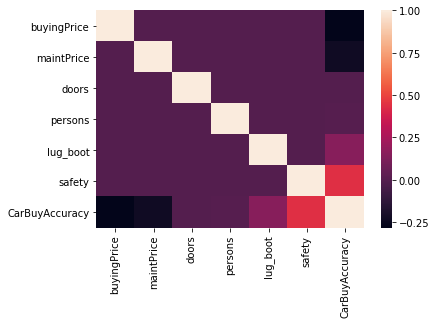

In [192]:
# plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [193]:
df.corr()

,buyingPrice,maintPrice,doors,persons,lug_boot,safety,CarBuyAccuracy
buyingPrice,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.282750
maintPrice,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.232422
doors,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000396
persons,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002871
lug_boot,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.157932
safety,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.439337
CarBuyAccuracy,-0.28275,-0.232422,0.000396,0.002871,0.157932,0.439337,1.000000


In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [195]:
X=df.iloc[:,0:6]
y = df.iloc[:,6]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [196]:
knn = KNeighborsClassifier(n_neighbors=31)

In [197]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=31, p=2,
           weights='uniform')

In [198]:
predictions = knn.predict(X_test)

In [199]:
ConfusionMatrics = confusion_matrix(y_test,predictions)

In [200]:
394/(394+34+5+0)

0.9099307159353349

In [201]:
#list of levels of car recommendation
l = ["vgood","good","acc","unacc"]

In [202]:
print("precsions")
for i in range(4):
    print(l[i],(ConfusionMatrics[i][i]/sum([ConfusionMatrics[i][j] for j in range(4) ])*100),"%")

precsions
vgood 99.24433249370277 %
good 72.86821705426357 %
acc 20.0 %
unacc 4.0 %


In [203]:
print("recalls")
for i in range(4):
    print(l[i],(ConfusionMatrics[i][i]/sum([ConfusionMatrics[j][i] for j in range(4) ])*100),"%")

recalls
vgood 90.99307159353349 %
good 72.86821705426357 %
acc 50.0 %
unacc 100.0 %


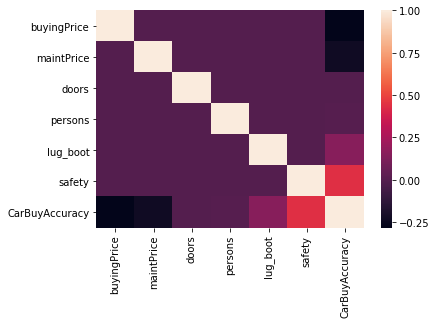

In [204]:
sns.heatmap(df.corr())


Training model with omitting the buying price and maint price from the attributs

In [205]:
X=df.iloc[:,2:6]
y = df.iloc[:,6]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [206]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
ConfusionMatrics = confusion_matrix(y_test,predictions,labels = [3,2,1,0])

In [207]:

print(ConfusionMatrics)

[[  0   0  25   0]
 [  0   0  12   8]
 [  0   0  65  64]
 [  0   0  23 374]]


In [208]:
#list of levels of car recommendation
l = ["vgood","good","acc","unacc"]

In [209]:
print("precsions")
for i in range(4):
    print(l[i],(ConfusionMatrics[i][i]/sum([ConfusionMatrics[i][j] for j in range(4) ])*100),"%")

precsions
vgood 0.0 %
good 0.0 %
acc 50.3875968992248 %
unacc 94.20654911838791 %


In [210]:
print("recalls")
for i in range(4):
    print(l[i],(ConfusionMatrics[i][i]/sum([ConfusionMatrics[j][i] for j in range(4) ])*100),"%")

recalls
vgood nan %
good nan %
acc 52.0 %
unacc 83.85650224215246 %


C:\Users\CHETAN SHARMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


#Result of omitting Buying price and maintainance price is that it cannot predict the vgood and good values